### Masive Data Lab Activities

Description : Read and Cleaning Data Sensor DHT22 
File        : T-DHT22-measures.csv 
              H-DHT22-measures.csv
              
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np

### 1. Temperature File (T-DHT22)

In [2]:
# Reading T-DHT22 file
df1 = pd.read_csv('../data/raw/measures/T-DHT22-measures.csv', parse_dates = ['time'])
df1.head()

,sensor,value,time
0,T-DHT22,25.5,2017-12-19 14:07:18
1,T-DHT22,25.5,2017-12-19 14:07:25
2,T-DHT22,25.6,2017-12-19 14:07:32
3,T-DHT22,25.6,2017-12-19 14:07:38
4,T-DHT22,25.6,2017-12-19 14:07:45


In [3]:
type(df1.time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [3]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440150 entries, 0 to 1440149
Data columns (total 3 columns):
sensor    1440150 non-null object
value     1440150 non-null float64
time      1440150 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 33.0+ MB


From information above, the data frame has 1440150 rows and 3 columns. Each column has 1440150 data, there is no missing data. 

In [4]:
# Get sensor's description 
df1.sensor.value_counts()

T-DHT22    1440150
Name: sensor, dtype: int64

In [5]:
# This data has only one sensor, I drop sensor column and rename column value to T_DHT22
new_df1 = df1.drop(['sensor'], axis='columns') 
new_df1.rename(columns= {'value' : 'T_DHT22'}, inplace = True )
new_df1.head()

,T_DHT22,time
0,25.5,2017-12-19 14:07:18
1,25.5,2017-12-19 14:07:25
2,25.6,2017-12-19 14:07:32
3,25.6,2017-12-19 14:07:38
4,25.6,2017-12-19 14:07:45


In [8]:
# Count missing data in each column
df1.isnull().sum()

sensor    0
value     0
time      0
dtype: int64

In [8]:
#Get statistical information
new_df1.describe()

,T_DHT22
count,1.440150e+06
mean,2.299986e+01
std,2.480804e+00
min,1.670000e+01
25%,2.170000e+01
50%,2.330000e+01
75%,2.480000e+01
max,2.980000e+01


File T-DHT22-measures.csv doesn't have any problem. There's no missing data and each column has a same format.

### 2. Humidity File (H-DHT22)

In [9]:
# Reading H-DHT22 file
df2 = pd.read_csv('../data/raw/measures/H-DHT22-measures.csv', parse_dates = ['time'])
df2.head()

,sensor,value,time
0,H-DHT22,15.7,2017-12-19 14:07:18
1,H-DHT22,15.7,2017-12-19 14:07:25
2,H-DHT22,15.7,2017-12-19 14:07:32
3,H-DHT22,15.7,2017-12-19 14:07:38
4,H-DHT22,15.7,2017-12-19 14:07:45


In [10]:
type(df2.time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
# Get General Information regarding data frame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440160 entries, 0 to 1440159
Data columns (total 3 columns):
sensor    1440160 non-null object
value     1440160 non-null float64
time      1440160 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 33.0+ MB


From information above, the data frame has 1440160 rows and 3 columns. Each column has 1440150 data, there is no missing data.

In [12]:
# Get General Information regarding data frame
df2.sensor.value_counts()

H-DHT22    1440160
Name: sensor, dtype: int64

In [13]:
# This data has only one sensor, I drop sensor column and rename column value to H_DHT22
new_df2 = df2.drop(['sensor'], axis='columns') 
new_df2.rename(columns= {'value' : 'H_DHT22'}, inplace = True )
new_df2.head()

,H_DHT22,time
0,15.7,2017-12-19 14:07:18
1,15.7,2017-12-19 14:07:25
2,15.7,2017-12-19 14:07:32
3,15.7,2017-12-19 14:07:38
4,15.7,2017-12-19 14:07:45


In [14]:
# Count missing data in each column
df2.isnull().sum()

sensor    0
value     0
time      0
dtype: int64

File H-DHT22-measures.csv doesn't have any problem. There's no missing data and each column has a same format.

### 3. Merge temperature and humidity data frame

In this section, I'm going to merge two dataframes into one data frame base on the time. After merging two data frames probably founded missing data either on column T_DGT22 or H_DHT22 because there is a difference between time in each data frame. 

In [15]:
# Merge data frame base on time columns
newdf = pd.merge(new_df1, new_df2, on = 'time', how='outer')
# Set time as a index of data frame
newdf.set_index('time', inplace=True)
newdf.head()

,T_DHT22,H_DHT22
time,,
2017-12-19 14:07:18,25.5,15.7
2017-12-19 14:07:25,25.5,15.7
2017-12-19 14:07:32,25.6,15.7
2017-12-19 14:07:38,25.6,15.7
2017-12-19 14:07:45,25.6,15.7


In [16]:
# Get general information
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1522253 entries, 2017-12-19 14:07:18 to 2018-03-13 11:38:20
Data columns (total 2 columns):
T_DHT22    1440150 non-null float64
H_DHT22    1440160 non-null float64
dtypes: float64(2)
memory usage: 34.8 MB


From information above, the data frame after merging has 1522253 rows. T_DHT22 and H_DHT22 respectively has 1440150 and 1440160 data. In other words, there is missing data in each column. 

In [18]:
# Count missing data in each column
newdf.isnull().sum()

T_DHT22    82103
H_DHT22    82093
dtype: int64

In [18]:
newdf.iloc[200:220]

,T_DHT22,H_DHT22
time,,
2017-12-19 15:47:36,27.0,2.0
2017-12-19 15:47:43,27.0,2.0
2017-12-19 15:47:50,27.0,1.8
2017-12-19 15:47:56,27.0,NaN
2017-12-19 15:48:03,27.0,1.7
2017-12-19 15:48:10,27.0,2.2
2017-12-19 15:48:17,27.0,2.1
2017-12-19 15:48:24,27.0,2.4
2017-12-19 15:48:30,27.0,2.4


In this case, I use interpolation base on time to handle missing data. These are the reason. 
1. Either temperature or humidity does not have a significant change over time.
2. The difference of time from one row to the next row is not same. 

In [19]:
# Handling missing data using interpolation
newdf.interpolate(method='time', inplace=True)
newdf.iloc[200:220]

,T_DHT22,H_DHT22
time,,
2017-12-19 15:47:36,27.0,2.000000
2017-12-19 15:47:43,27.0,2.000000
2017-12-19 15:47:50,27.0,1.800000
2017-12-19 15:47:56,27.0,1.753846
2017-12-19 15:48:03,27.0,1.700000
2017-12-19 15:48:10,27.0,2.200000
2017-12-19 15:48:17,27.0,2.100000
2017-12-19 15:48:24,27.0,2.400000
2017-12-19 15:48:30,27.0,2.400000


In [20]:
# Get statistical information of data frame
newdf.describe()

,T_DHT22,H_DHT22
count,1.522253e+06,1.522253e+06
mean,2.298896e+01,1.001344e+00
std,2.492273e+00,1.943594e-01
min,1.670000e+01,1.000000e+00
25%,2.170000e+01,1.000000e+00
50%,2.330000e+01,1.000000e+00
75%,2.480000e+01,1.000000e+00
max,2.980000e+01,9.990000e+01


### 4. Data Visualization

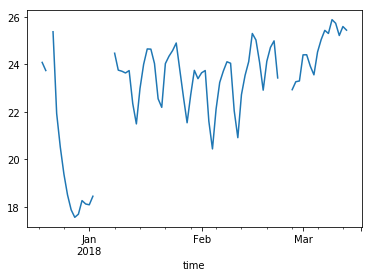

In [25]:
%matplotlib inline
# Visualization the average temperature based on time (day)
newdf.T_DHT22.resample('D').mean().plot()

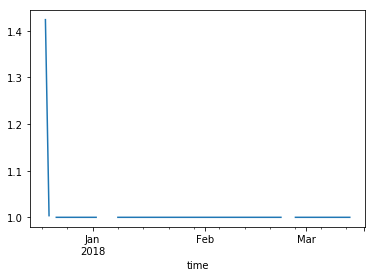

In [23]:
# Visualization the average humidity based on time (day)
newdf.H_DHT22.resample('D').mean().plot()

Note :
There are missing data in temperature and humidity graphs,
it happens because there is no data both in temperature and humidity dataframe 